In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import re

from wordcloud import WordCloud

import nltk
stop_words = nltk.corpus.stopwords.words('english')
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [3]:
!pip install contractions

  Obtaining dependency information for contractions from https://files.pythonhosted.org/packages/bb/e4/725241b788963b460ce0118bfd5c505dd3d1bdd020ee740f9f39044ed4a7/contractions-0.1.73-py2.py3-none-any.whl.metadata
  Obtaining dependency information for textsearch>=0.0.21 from https://files.pythonhosted.org/packages/e2/0f/6f08dd89e9d71380a369b1f5b6c97a32d62fc9cfacc1c5b8329505b9e495/textsearch-0.0.24-py2.py3-none-any.whl.metadata
  Obtaining dependency information for anyascii from https://files.pythonhosted.org/packages/4f/7b/a9a747e0632271d855da379532b05a62c58e979813814a57fa3b3afeb3a4/anyascii-0.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for pyahocorasick from https://files.pythonhosted.org/packages/96/01/4e4c5e3ff80eeafee2d3f510a71558e1317a13893360dd2c68276bb7514a/pyahocorasick-2.1.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.1 MB/s eta 0:00:00:00:01


In [4]:
!pip install unidecode

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#----------SKLEARN--------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV


from sklearn.cluster import KMeans , AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score


#-------NLTK--------------
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from unidecode import unidecode
from contractions import fix
from nltk.util import ngrams

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from wordcloud import WordCloud

#-------TENSORFLOW---------
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input, SimpleRNN, LSTM , GRU, Bidirectional, Embedding
from keras.layers import Dropout

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

In [32]:
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import pytesseract

import re

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier


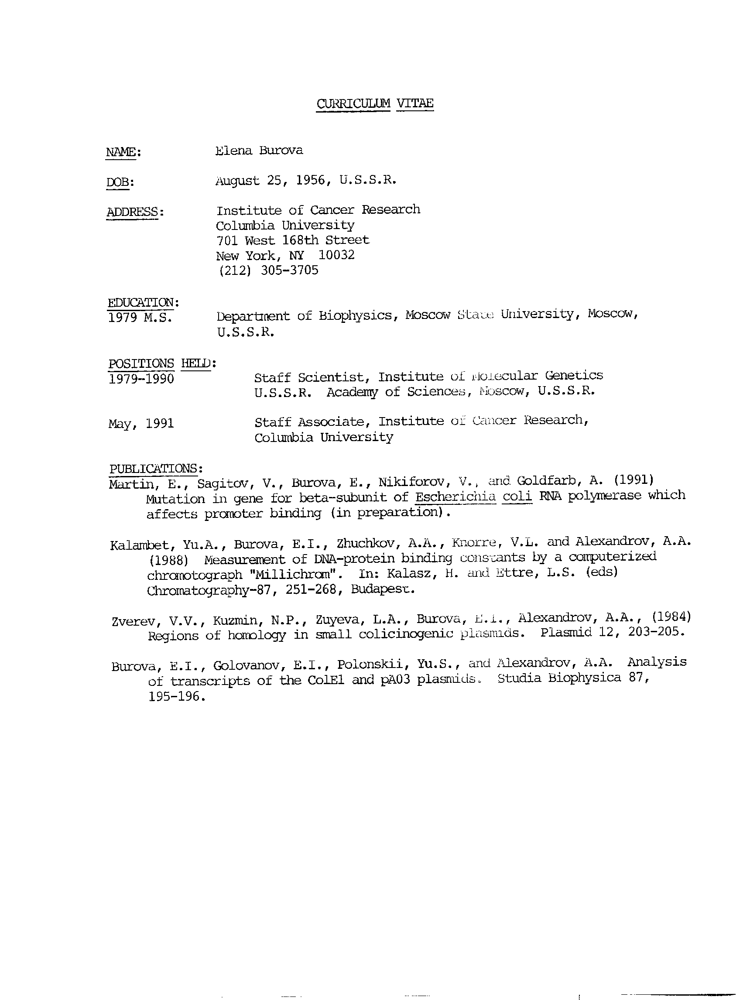

In [33]:
path = "data/resume/doc_000051.png"
image = Image.open(path)
image

In [18]:
text = pytesseract.image_to_string(image)
text

'CURRICULUM VITAE\n\nNOME: lena Burova\nDOB: August 25, 1956, U.S.S.R.\nADDRESS: Institute of Cancer Research\n\nColumbia University\n701 West 168th Street\nNew York, NY 10032\n(212) 305-3705\n\nEDUCATION:\n1979 M.S. Department of Biophysics, Moscow Stav: University, Moscow,\nUS.S.R.\n\nPOSITIONS HELD:\n1979-1990 Staff Scientist, Institute of soc:ccular Genetics\nU.8.8.R. Academy of Sciences, Nuscow, U.S.S.R,\n\nMay, 1991 Staff associate, Institute of Cancer Research,\nColumbia University\n\nPUBLICATIONS:\n\n¥artin, E., Sagitov, V., Burova, E., Nikiforov, V., and Goldfarb, A. (1991)\n‘Mutation in gene for beta-subunit of Escherichia coli RNA polymerase which\naffects promoter binding (in preparation) .\n\nKalanbet, Yu.A., Burova, E.I., Zhuchkov, A.A., Knorre, V-L. and Alexandrov, A.A.\n(1988) Measurement of DNA-protein binding consvants by a computerized\nchranotograph "Millichron". In: Kalasz, H. and uttre, L.S. (eds)\nChromatography-87, 251-268, Budapesc.\n\naverev, V.V., Kuzmin, N.P

In [19]:
stopwords_list = stopwords.words("english")
#stopwords_list

In [20]:
def preprocess_data(text):
    text = text.lower()
    text = text.replace("\n"," ").replace("\t"," ")
    text = re.sub("\s+"," ",text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    # tokens
    tokens = word_tokenize(text)
    
    data = [i for i in tokens if i not in punctuation]
    data = [i for i in data if i not in stopwords_list]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    final_text = []
    for i in data:
        word = lemmatizer.lemmatize(i)
        final_text.append(word)
        
    return " ".join(final_text)

#preprocess_data(text)

In [22]:
import os

class_labels = {'email':0,'resume':1,'scientific_publication':2}

final_text = []
final_label = []
path = "data"
image_folder = os.listdir(path)

for label in image_folder:
        #print(label)
        label_path = os.path.join(path,label)
        for j in os.listdir(label_path):
            #print(j)
            image = Image.open(label_path+"/"+j)
            #print(image)
            text = pytesseract.image_to_string(image)
            text_data = preprocess_data(text)
            
            final_text.append(text_data)
            final_label.append(class_labels[label])
        

In [23]:
df = pd.DataFrame()
df['Text'] = final_text
df['Label'] = final_label
df

,Text,Label
0,grant number biographical sketch give followin...,1
1,biographical sketch name birthdate schnaper h ...,1
2,curriculum vita john h collins phd principal i...,1
3,ya _etuie uav principal investigatorprogram di...,1
4,fe principal investigatorprogram director last...,1
...,...,...
160,bryan brown adam smith jan fuhon ce bcc primar...,0
161,robinson john coggins chris townsend david boc...,0
162,procedure note date october yemporary effectiv...,0
163,ogden davis riley ce bc primary date last modi...,0


In [24]:
df.iloc[110]

Text     per know need add hanover also want add peters...
Label                                                    0
Name: 110, dtype: object

In [25]:
df['Text'][110]

'per know need add hanover also want add petersburg colonial height hopewell nc want add raleigh union'

In [26]:
df['Label'].value_counts()

1    55
2    55
0    55
Name: Label, dtype: int64

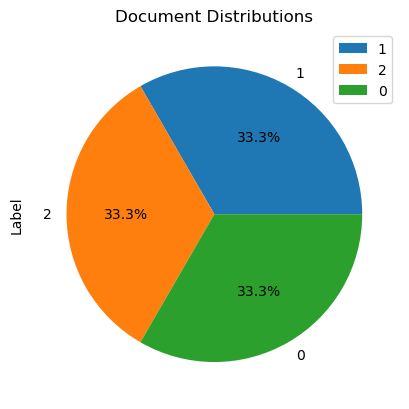

In [27]:
df['Label'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.title("Document Distributions")
plt.legend()
plt.show()